In [2]:
import random
import boolean2pew as b2p
import pandas as pd
import numpy as np
import EnsembleSimulation as es

In [3]:
def general_async_pick( lines ):
    line = [ random.choice( lines )]
    return line

def sigmoid(epsilon, x):
    return (1 / (1 + np.exp(-epsilon*(x))) )

## Reproducing the results of the Poret et al paper

Poret, A., Sousa, C. M., & Boissel, J. P. (2014). Enhancing Boolean networks with fuzzy operators and edge tuning.
https://hal.archives-ouvertes.fr/hal-01018236v4

For each simulation the first image is reproduced from the paper and the following plot is the reproduction of the qulaitative behavior with the PEW operators.

In [7]:
update_scheme_name='async'
update_mode='async'
shuffler=general_async_pick

initial_state={'EGF':0, 
               'HRG':0,
               'EGFR':0,
               'PI3K':0, 
               'AKT':0, 
               'Raf':0, 
               'ERK':0}
node_order=list(initial_state.keys())
break_state=[]

ensemble_size=1000
steps=200
end_EGF=50

## Simulation 1 

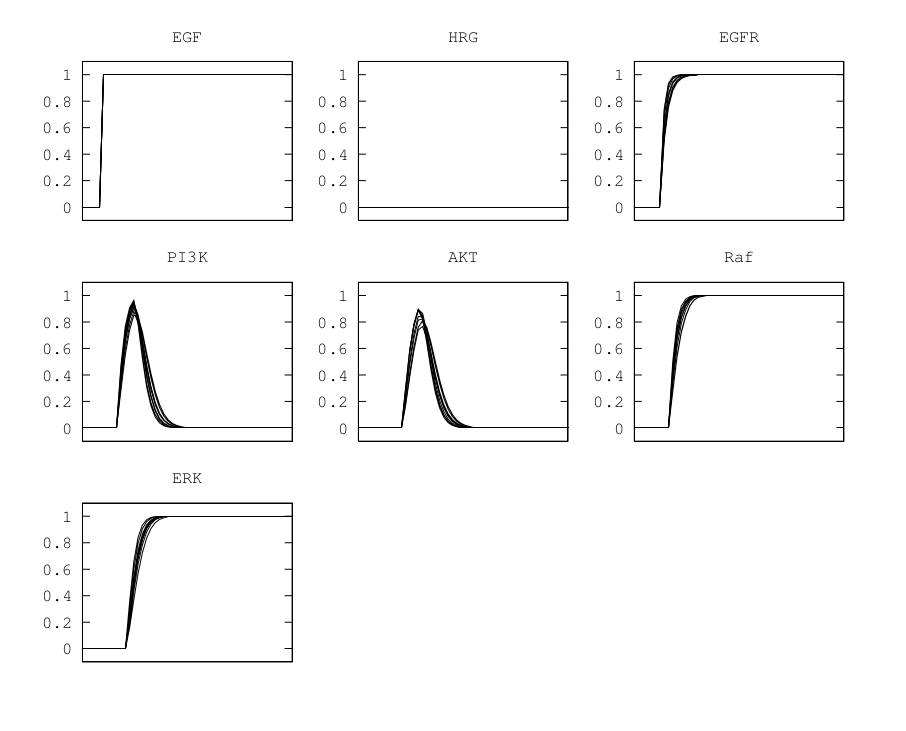

100%|██████████| 1000/1000 [00:09<00:00, 101.59it/s]


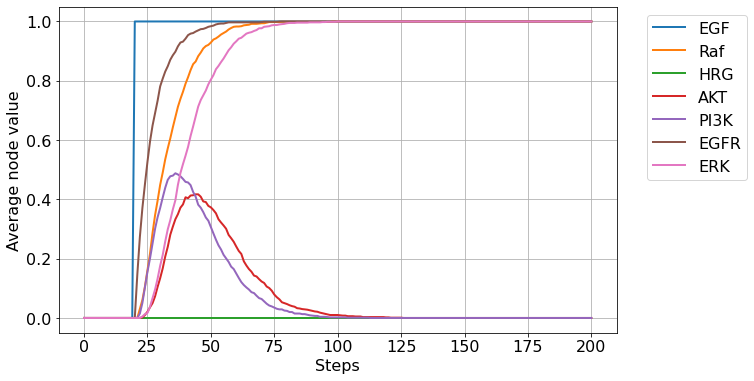

In [10]:
rules = '''EGF*= EGF
HRG*= HRG
EGFR*= EGF or HRG
PI3K*= EGFR and not ERK
AKT*= PI3K
Raf*= EGFR or AKT
ERK*= Raf'''

end_EGF=steps
manipulation_set=[{'node':'EGF','enforced_state':1, 'start_time':20, 'end_time':end_EGF,'success_probability':1}]

model = b2p.Model(rules, mode=update_mode)

sim=es.EnsembleSimulation(model,shuffler=shuffler,ensemble_size=ensemble_size, steps=steps)
sim.simulate_manipulated_ensemble(manipulation_set)
sim.plot_node_evolution_averages(linewidth=2)

## Simulation 2 

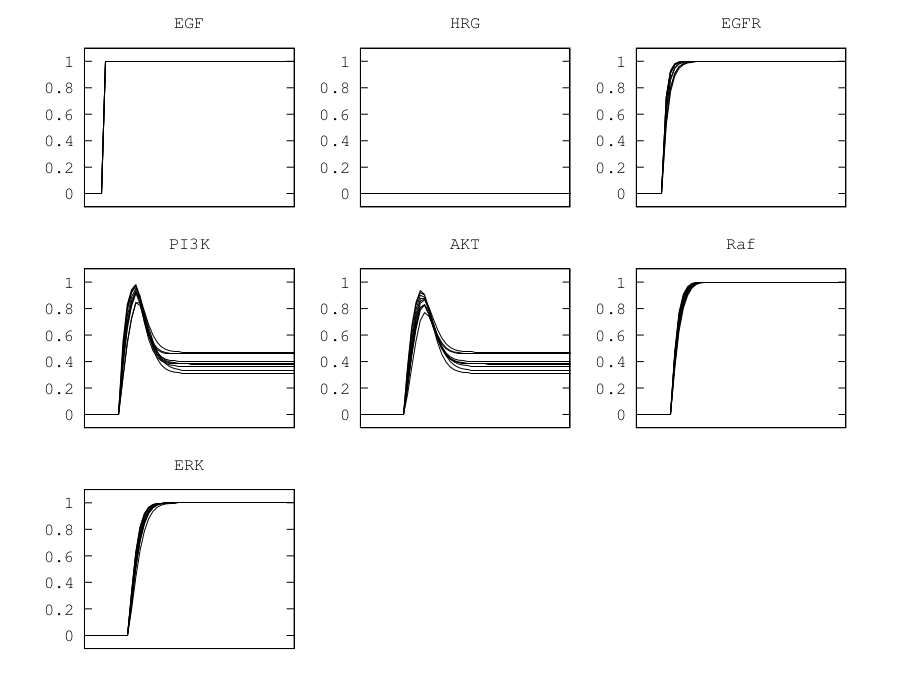

100%|██████████| 1000/1000 [00:10<00:00, 91.28it/s]


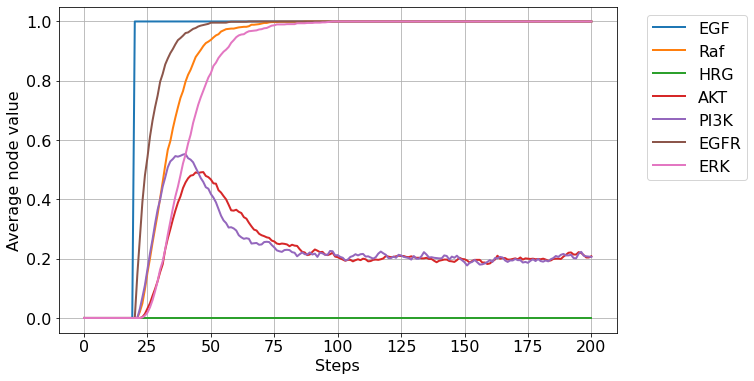

In [12]:
rules = '''EGF*= EGF
HRG*= HRG
EGFR*= EGF or HRG
PI3K*= EGFR and [1,0.2]not ERK
AKT*= PI3K
Raf*= EGFR or AKT
ERK*= Raf'''

end_EGF=steps
manipulation_set=[{'node':'EGF','enforced_state':1, 'start_time':20, 'end_time':end_EGF,'success_probability':1}]

model = b2p.Model(rules, mode=update_mode)

sim=es.EnsembleSimulation(model,shuffler=shuffler,ensemble_size=ensemble_size, steps=steps)
sim.simulate_manipulated_ensemble(manipulation_set)
sim.plot_node_evolution_averages(linewidth=2)

## Simulation 3

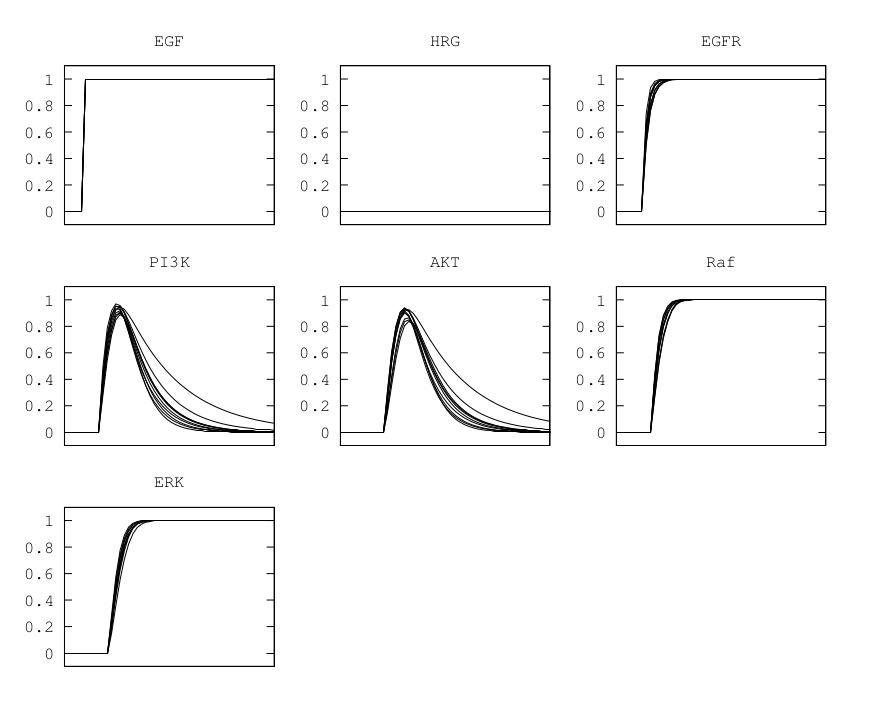

For this we would need an e vector to store the $e_{ij}(k)$ values as well:
    $e_{ij}(k+1) = (1 - p_{ij})\cdot e_{ij}(k) + p_{ij} \cdot x_i(k)$
<br>
Here we add an extra node representing the edge, also using the addition "+" operator in the rule. 

$e_{ij}(k+1) = (1 - p_{ij})\cdot e_{ij}(k) + p_{ij} \cdot x_i(k)$

100%|██████████| 1000/1000 [00:11<00:00, 86.16it/s]


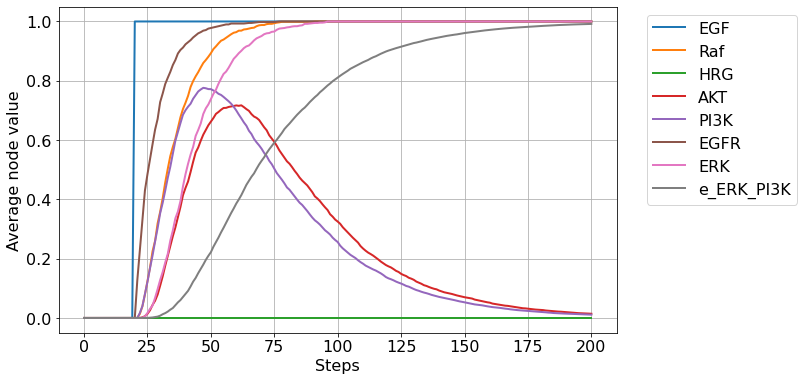

In [14]:
rules = '''EGF*= EGF
HRG*= HRG
EGFR*= EGF or HRG
PI3K*= EGFR and not e_ERK_PI3K
AKT*= PI3K
Raf*= EGFR or AKT
ERK*= Raf
e_ERK_PI3K*= (0.75 and e_ERK_PI3K) + (0.25 and ERK)'''


initial_state={'EGF':0, 
               'HRG':0,
               'EGFR':0,
               'PI3K':0, 
               'AKT':0, 
               'Raf':0, 
               'ERK':0,
               'e_ERK_PI3K':0}

end_EGF=steps
manipulation_set=[{'node':'EGF','enforced_state':1, 'start_time':20, 'end_time':end_EGF,'success_probability':1}]

model = b2p.Model(rules, mode=update_mode)

sim=es.EnsembleSimulation(model,shuffler=shuffler,ensemble_size=ensemble_size, steps=steps)
sim.simulate_manipulated_ensemble(manipulation_set)
sim.plot_node_evolution_averages(linewidth=2)

## Simulation 4

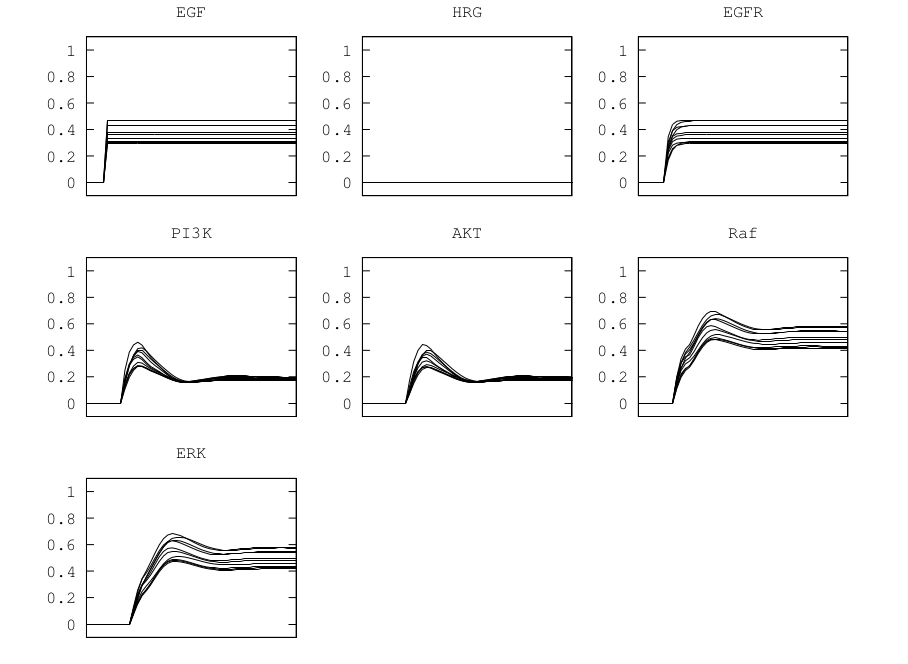

100%|██████████| 1000/1000 [00:09<00:00, 106.74it/s]


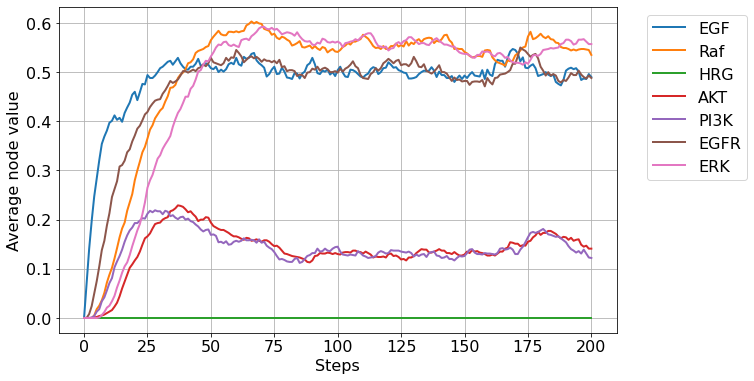

In [15]:
rules = '''EGF*= [0.5,0.5](EGF)
HRG*= HRG
EGFR*= EGF or HRG
PI3K*= EGFR and not ERK
AKT*= PI3K
Raf*= EGFR or AKT
ERK*= Raf'''

initial_state={'EGF':0, 
               'HRG':0,
               'EGFR':0,
               'PI3K':0, 
               'AKT':0, 
               'Raf':0, 
               'ERK':0}
end_EGF=steps
manipulation_set=[{'node':'EGF','enforced_state':1, 'start_time':20, 'end_time':end_EGF,'success_probability':1}]

model = b2p.Model(rules, mode=update_mode)

sim=es.EnsembleSimulation(model,shuffler=shuffler,ensemble_size=ensemble_size, steps=steps)
sim.simulate_manipulated_ensemble([])
sim.plot_node_evolution_averages(linewidth=2)

## Simulation 5

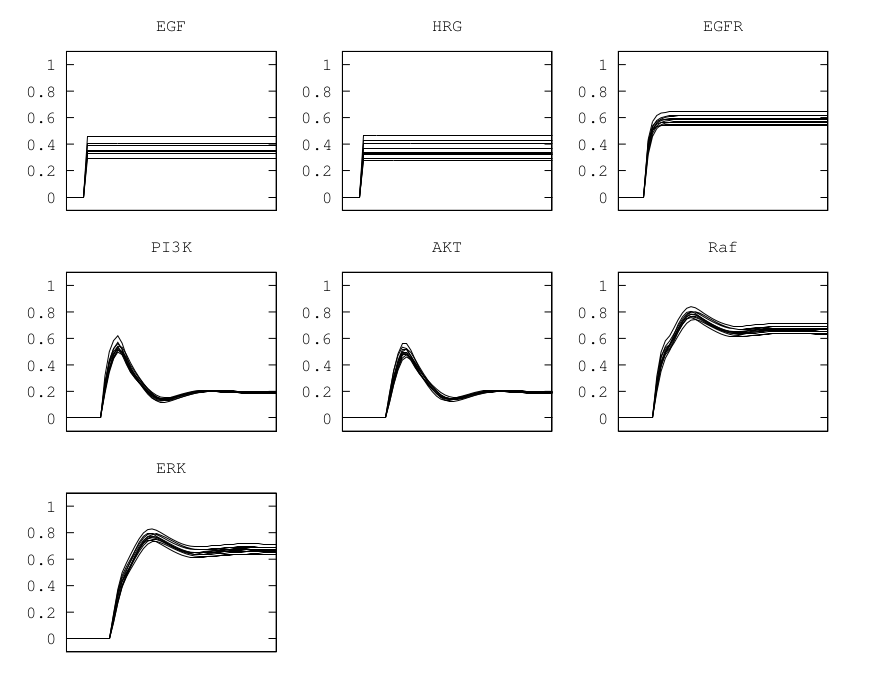

100%|██████████| 1000/1000 [00:10<00:00, 91.19it/s]


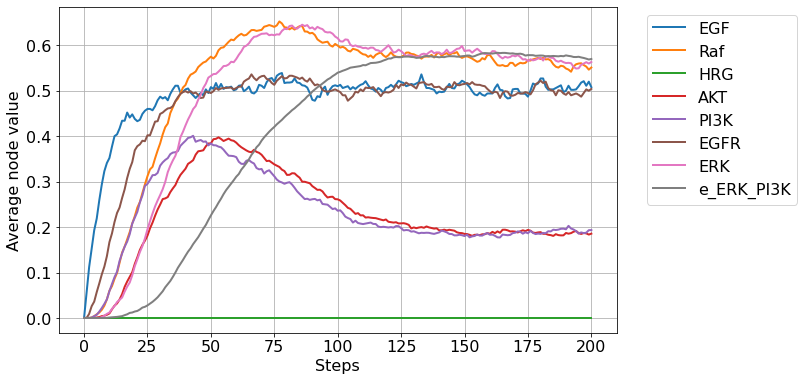

In [16]:
rules = ''' EGF*= [0.5,0.5] EGF
HRG*= HRG
EGFR*= EGF or HRG
PI3K*= EGFR and not e_ERK_PI3K
AKT*= PI3K
Raf*= EGFR or AKT
ERK*= Raf
e_ERK_PI3K*= (0.75 and e_ERK_PI3K) + (0.25 and ERK)'''

initial_state={'EGF':0, 
               'HRG':0,
               'EGFR':0,
               'PI3K':0, 
               'AKT':0, 
               'Raf':0, 
               'ERK':0,
               'e_ERK_PI3K':0}
end_EGF=steps
manipulation_set=[{'node':'EGF','enforced_state':1, 'start_time':20, 'end_time':end_EGF,'success_probability':1}]

model = b2p.Model(rules, mode=update_mode)

sim=es.EnsembleSimulation(model,shuffler=shuffler,ensemble_size=ensemble_size, steps=steps)
sim.simulate_manipulated_ensemble(manipulation_set=[])
sim.plot_node_evolution_averages(linewidth=2)